Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.image as mpimg
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_dir = "Train_Test_Path\Train"
test_dir = "Train_Test_Path\Test"
data_dir_train = pathlib.Path(train_dir)
data_dir_test = pathlib.Path(test_dir)

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,  batch_size=batch_size, image_size=(img_height, img_width), 
    seed=123, validation_split=0.2, subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,  batch_size=batch_size, image_size=(img_height, img_width), 
    seed=123, validation_split=0.2, subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

C:\Users\sudip\Desktop\AI&ML\DL & NN\CNN_Assignment


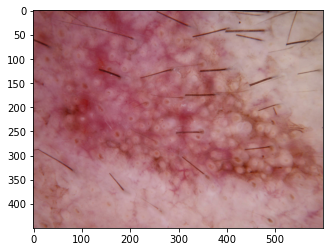

In [9]:
print(os.getcwd())
img=mpimg.imread("Train_Test_Path\\Train\\actinic keratosis\\ISIC_0025780.jpg")
plt.imshow(img)

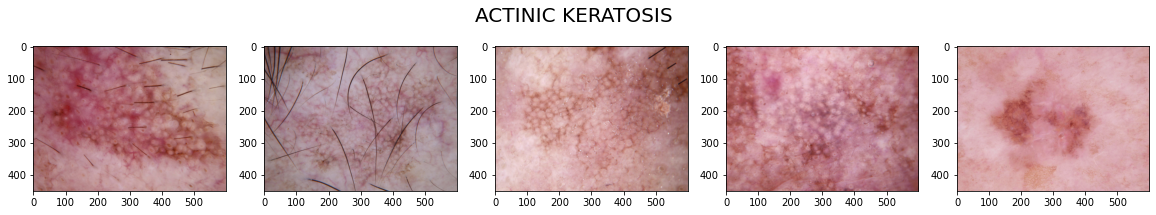

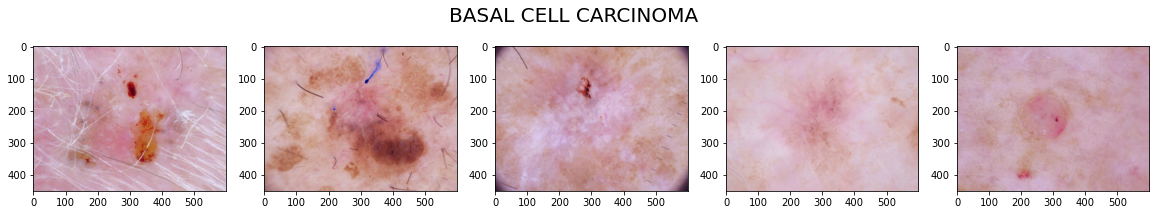

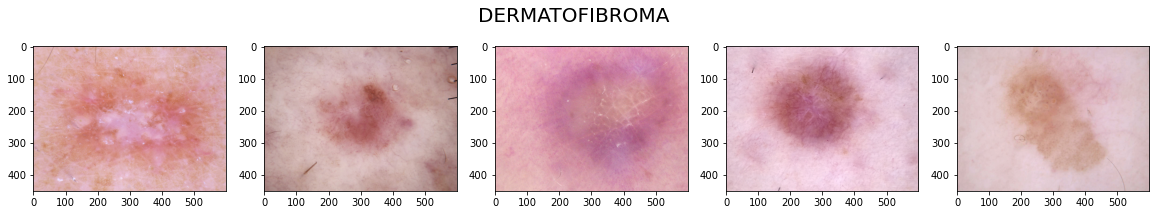

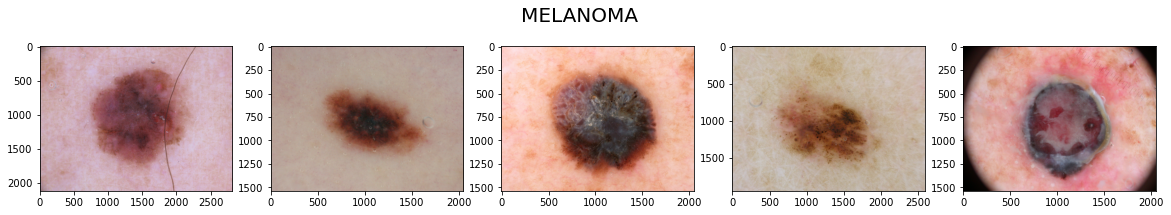

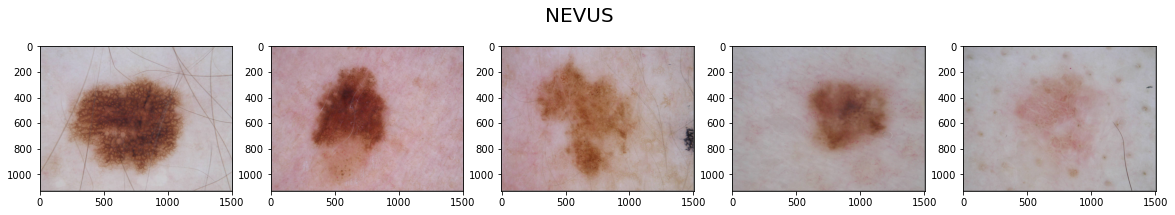

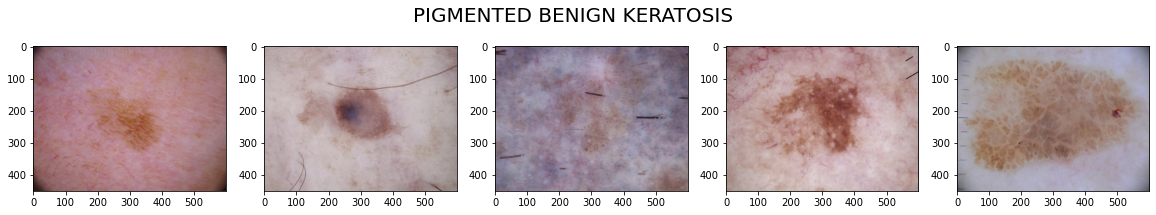

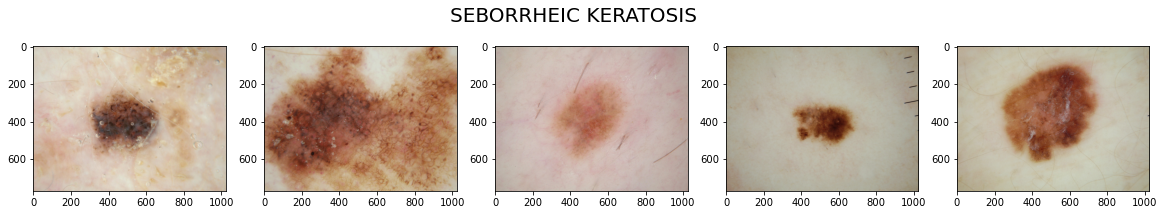

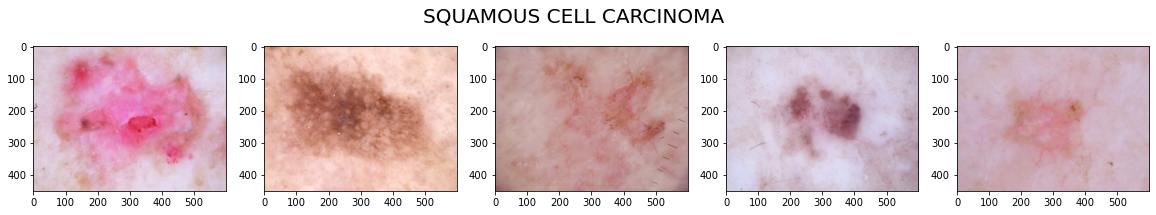

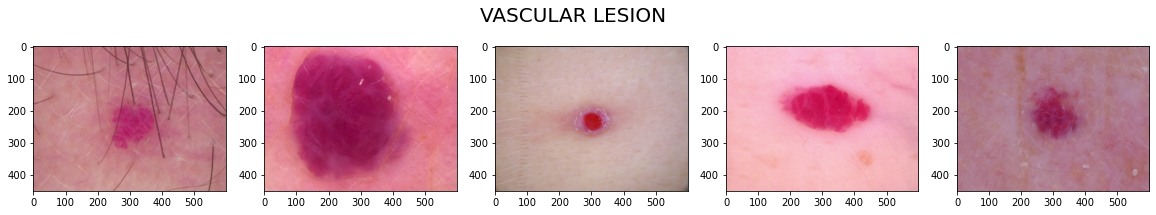

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
for each_class in class_names:
    fig = plt.figure(figsize=[20,20])
    fig.suptitle(each_class.upper(), fontsize=20, y=0.58)
    images = list(data_dir_train.glob(each_class + '/*.jpg'))
    count = 1
    for file in images[0:5]:        
        img=mpimg.imread(file)
        plt.subplot(1, 5, count)
        count += 1
        plt.imshow(img)
    plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

Sequential (
    - rescaling
    - conv2d
    - MaxPool
    - conv2d
    - MaxPool
    - conv2d
    - MaxPool
    - Flatten
    - Dense
    - Dense
)

In [14]:
### Your code goes here
# model
input_shape = (img_height, img_width, 3)
num_classes = len(class_names)
model = Sequential()

# note that the first layer needs to be told the input shape explicitly
model.add(keras.layers.InputLayer(input_shape=input_shape))

# Normalization layer - Scaling int [0,1]
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255))

# first conv layer and pooling layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer and pooling layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third conv layer and pooling layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 128)      

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
14/14 [==============================] - 45s 3s/step - loss: 3.0476 - accuracy: 0.1788 - val_loss: 1.9903 - val_accuracy: 0.2103
Epoch 2/20
14/14 [==============================] - 34s 2s/step - loss: 1.9705 - accuracy: 0.2578 - val_loss: 1.8273 - val_accuracy: 0.3333
Epoch 3/20
14/14 [==============================] - 32s 2s/step - loss: 1.8758 - accuracy: 0.3410 - val_loss: 1.6413 - val_accuracy: 0.3982
Epoch 4/20
14/14 [==============================] - 32s 2s/step - loss: 1.6773 - accuracy: 0.3869 - val_loss: 1.7919 - val_accuracy: 0.3803
Epoch 5/20
14/14 [==============================] - 32s 2s/step - loss: 1.7786 - accuracy: 0.3639 - val_loss: 1.6863 - val_accuracy: 0.3691
Epoch 6/20
14/14 [==============================] - 32s 2s/step - loss: 1.6725 - accuracy: 0.3681 - val_loss: 1.4737 - val_accuracy: 0.5235
Epoch 7/20
14/14 [==============================] - 35s 3s/step - loss: 1.4392 - accuracy: 0.5103 - val_loss: 1.3544 - val_accuracy: 0.5436
Epoch 8/20
14/14 [==

### Visualizing training results

In [28]:
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

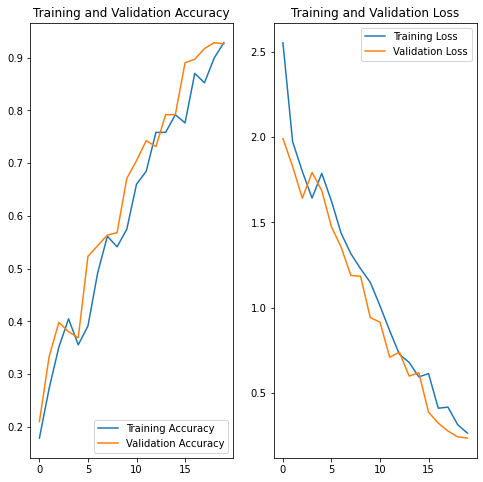

In [29]:
plot_accuracy_loss(history)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

##### From the above "Training v/s Validation Accuracy" plot, we can't see any overfit or uderfit situation. But it looks weird somehow. Here "Validation Accuracy" is little bit higher than "Training Accuracy".

#### Reasons:
There are a number of reasons this can happen. Two major reasons are listed below - 
    1. Variation ins dataset -> Lesser variation present in datset. As a result, the model is ver basic and not able to      cover enough complexity & variance.
    
    2. Size of the data for training & validation - Here both - training and validation, data size are small. So, Validation set is too small to dequately represent the probability distribution of the data. And, Training set doesn't contain           enough data to adequately train the model.

#### Solution:
We need to increase our data size and variation. To achieve it, we can use below methodologies -
    1. Data Augmentation - To increase the variance in dataset.
    2. Augmentor library - To increase the data size 


### Lets try - Data Augmentation

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.1, 0.3)
])

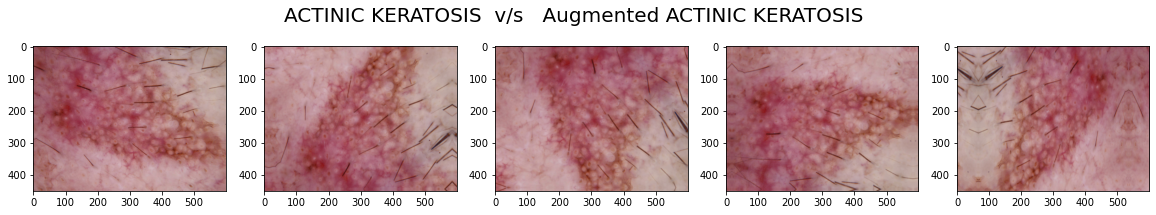

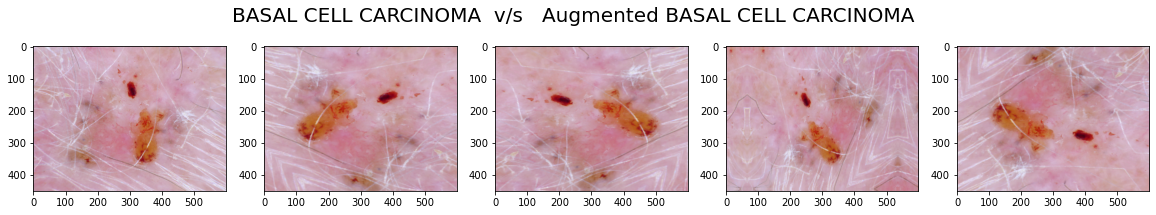

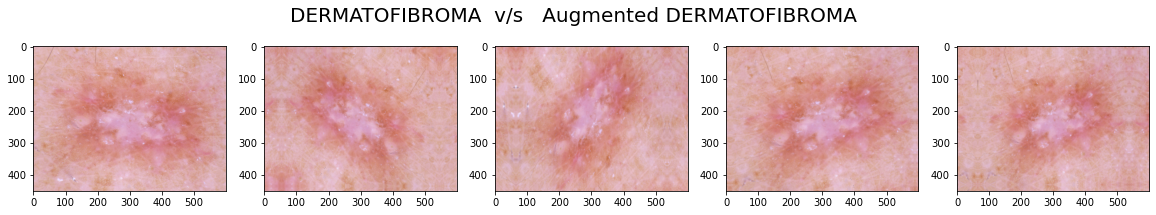

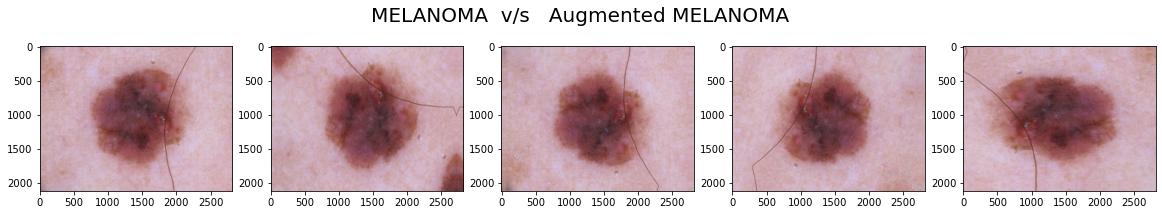

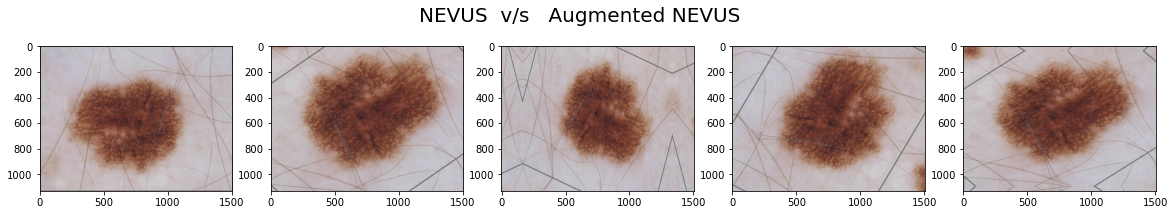

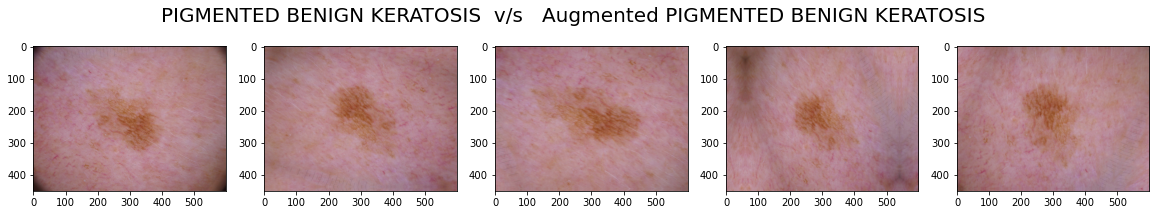

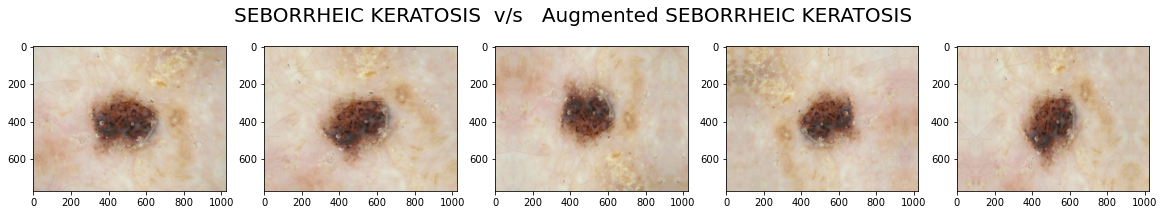

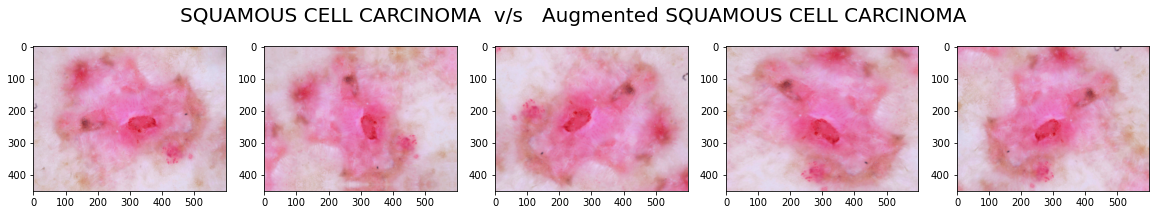

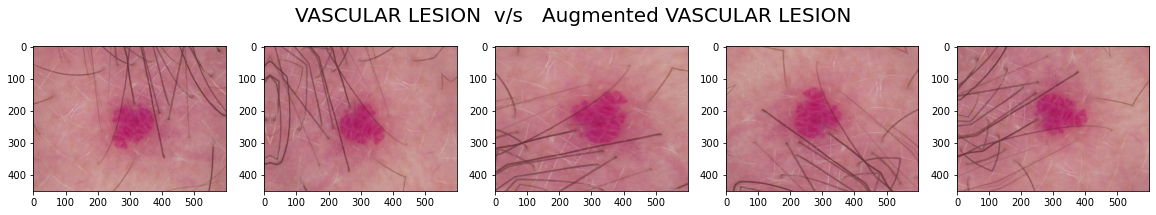

In [25]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

for each_class in class_names:
    fig = plt.figure(figsize=[20,20])
    fig.suptitle(each_class.upper()+"  v/s   Augmented " + each_class.upper(), fontsize=20, y=0.58)
    images = list(data_dir_train.glob(each_class + '/*.jpg'))
    image=mpimg.imread(images[0])
    plt.subplot(1, 5, 1)
    plt.imshow(image)
    image = tf.expand_dims(image, 0)
    for i in range(2, 6):
        augmented_image = data_augmentation(image)
        plt.subplot(1, 5, i)
        plt.imshow(augmented_image[0])
    plt.show()

### Todo:
### Create the model, compile and train the model


Sequential (
    - rescaling
    - augmentation
    - conv2d
    - MaxPool
    - conv2d
    - MaxPool
    - conv2d
    - MaxPool
    - Flatten
    - Dense
    - Dense
)

In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model_augmentation = Sequential()

# note that the first layer needs to be told the input shape explicitly
model_augmentation.add(keras.layers.InputLayer(input_shape=input_shape))

# Normalization layer - Scaling int [0,1]
model_augmentation.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255))

# Data augmentation layer - Flip, Rotation & Zoom
model_augmentation.add(data_augmentation)

# first conv layer and pooling layer
model_augmentation.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_augmentation.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer and pooling layer
model_augmentation.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_augmentation.add(MaxPooling2D(pool_size=(2, 2)))

# third conv layer and pooling layer
model_augmentation.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_augmentation.add(MaxPooling2D(pool_size=(2, 2)))

# flatten and put a fully connected layer
model_augmentation.add(Flatten())
model_augmentation.add(Dense(256, activation='relu'))

# softmax layer
model_augmentation.add(Dense(num_classes, activation='softmax'))

### Compiling the model

In [31]:
## Your code goes here
model_augmentation.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model_augmentation.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, None, None, 3)     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 128)      

### Training the model

In [32]:
## Your code goes here, note: train your model for 20 epochs
history_augmentation = model_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
14/14 [==============================] - 40s 3s/step - loss: 4.1060 - accuracy: 0.1813 - val_loss: 2.0070 - val_accuracy: 0.2483
Epoch 2/20
14/14 [==============================] - 37s 3s/step - loss: 1.9759 - accuracy: 0.2920 - val_loss: 1.8942 - val_accuracy: 0.3423
Epoch 3/20
14/14 [==============================] - 37s 3s/step - loss: 1.8682 - accuracy: 0.3214 - val_loss: 1.7418 - val_accuracy: 0.3937
Epoch 4/20
14/14 [==============================] - 38s 3s/step - loss: 1.7281 - accuracy: 0.3977 - val_loss: 1.7390 - val_accuracy: 0.3915
Epoch 5/20
14/14 [==============================] - 37s 3s/step - loss: 1.6260 - accuracy: 0.4455 - val_loss: 1.6685 - val_accuracy: 0.3557
Epoch 6/20
14/14 [==============================] - 37s 3s/step - loss: 1.6766 - accuracy: 0.3727 - val_loss: 1.5511 - val_accuracy: 0.4474
Epoch 7/20
14/14 [==============================] - 38s 3s/step - loss: 1.5867 - accuracy: 0.4403 - val_loss: 1.5813 - val_accuracy: 0.4385
Epoch 8/20
14/14 [==

### Visualizing the results

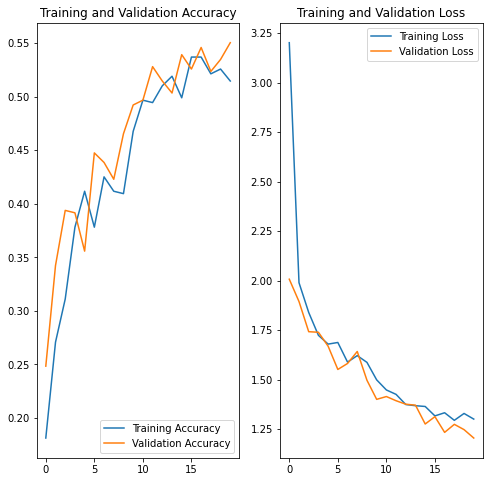

In [33]:
plot_accuracy_loss(history_augmentation)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### After Data Augmentation

We can see that our model's performance is decreased from the basic model (previous model). Accuracy is only 55% for this model. So surely, this is not better than previous one.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [63]:
## Your code goes here.
class_distribution_list = [len(list(data_dir_train.glob(each_class + '/*.jpg'))) for each_class in class_names]
class_distribution_series = pd.Series(class_distribution_list, index=class_names)
class_distribution_series.sort_values(ascending=False)

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

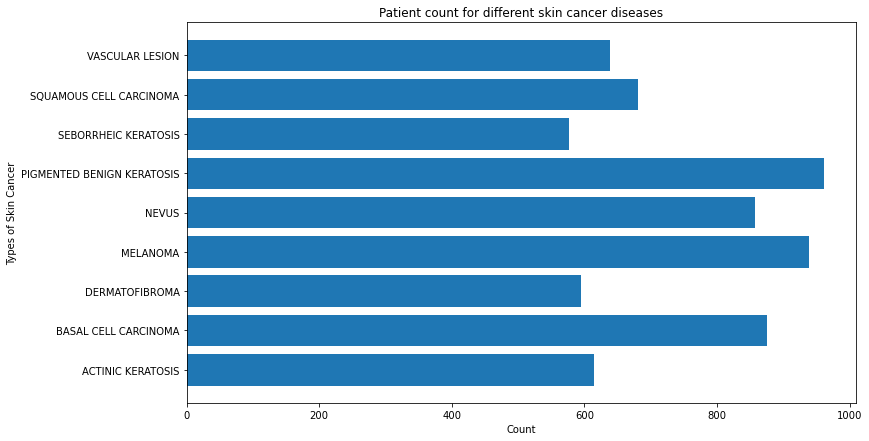

In [124]:
plt.figure(figsize=[12,7])
plt.barh(list(map(lambda x : x.upper(), class_names)), class_distribution_list)
plt.ylabel("Types of Skin Cancer")
plt.xlabel("Count")
plt.title("Patient count for different skin cancer diseases")
plt.show()

#### **Todo:** Write your findings here: 

#### - Which class has the least number of samples?
    - Seborrheic Keratosis (77)

#### - Which classes dominate the data in terms proportionate number of samples?
    1. Pigmented Benign Keratosis (462)
    2. Melanoma (438)
    3. Basal Cell Carcinoma (376)

#### **Todo:** Rectify the class imbalance

Here we can clearly see that data is not properly distributed over all the classes. So, this is an data imbalance problem. Also we need to increase the data size.

So, Here "Over Sampling" is more suitable method. To increase the datasize and resolve the class imbalance problem, we will use "Augmentor" library.

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [64]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [66]:
path_to_training_dataset=train_dir + "\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Train_Test_Path\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B40B2952E0>: 100%|█| 500/500 [00:22<00:00, 21.78 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Train_Test_Path\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B429846640>: 100%|█| 500/500 [00:20<00:00, 23.87 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B42980CB80>:   0%| | 1/500 [00:00<01:17,  6.41 Samples/s]

Initialised with 95 image(s) found.
Output directory set to Train_Test_Path\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B4209387C0>: 100%|█| 500/500 [00:23<00:00, 21.68 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Train_Test_Path\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2B421D175B0>: 100%|█| 500/500 [01:41<00
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Train_Test_Path\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2012x1956 at 0x2B420D14C40>: 100%|█| 500/500 [01:32<00:00,  5.40 Sample
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B421D17B80>:   0%| | 1/500 [00:00<01:16,  6.50 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Train_Test_Path\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B429800790>: 100%|█| 500/500 [00:21<00:00, 23.39 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Train_Test_Path\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2B429809B80>: 100%|█| 500/500 [00:49<00
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2B429838760>:   0%| | 1/500 [00:00<01:05

Initialised with 181 image(s) found.
Output directory set to Train_Test_Path\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B4297C6E50>: 100%|█| 500/500 [00:21<00:00, 23.39 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Train_Test_Path\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B4297F6400>: 100%|█| 500/500 [00:22<00:00, 22.42 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [67]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [86]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [95]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [98]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list, lesion_list))

In [99]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [100]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [101]:
batch_size = 32
img_height = 180
img_width = 180

In [114]:
## Copy the new created samples from "output" folder to <class> folder
## And remove "<class>/output" directory
import shutil
for each_class in class_names:
    class_path = os.path.join(train_dir, each_class)
    output_path = os.path.join(train_dir, each_class, "output")
    for file in os.listdir(output_path):
        shutil.move(os.path.join(output_path, file), class_path)
    shutil.rmtree(output_path)

In [115]:
class_distribution_list = [len(list(data_dir_train.glob(each_class + '/*.jpg'))) for each_class in class_names]
class_distribution_series = pd.Series(class_distribution_list, index=class_names)
class_distribution_series.sort_values(ascending=False)

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
dtype: int64

#### **Todo:** Create a training dataset

In [117]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [118]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [119]:
## your code goes here
# model
model_final = Sequential()

# note that the first layer needs to be told the input shape explicitly
model_final.add(keras.layers.InputLayer(input_shape=input_shape))

# Normalization layer - Scaling int [0,1]
model_final.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255))

# first conv layer and pooling layer
model_final.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Dropout(0.1))

# second conv layer and pooling layer
model_final.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Dropout(0.1))

# third conv layer and pooling layer
model_final.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Dropout(0.1))

# flatten and put a fully connected layer
model_final.add(Flatten())
model_final.add(Dense(256, activation='relu'))
model_final.add(Dropout(0.1))

# softmax layer
model_final.add(Dense(num_classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [120]:
## your code goes here
model_final.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model_final.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 64)       

#### **Todo:**  Train your model

In [121]:
epochs = 30
## Your code goes here, use 30 epochs.
history_final = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 474s 3s/step - loss: 2.6005 - accuracy: 0.1679 - val_loss: 1.6145 - val_accuracy: 0.3801
Epoch 2/30
169/169 [==============================] - 474s 3s/step - loss: 1.5423 - accuracy: 0.4129 - val_loss: 1.4079 - val_accuracy: 0.4870
Epoch 3/30
169/169 [==============================] - 474s 3s/step - loss: 1.3531 - accuracy: 0.4912 - val_loss: 1.3679 - val_accuracy: 0.4878
Epoch 4/30
169/169 [==============================] - 492s 3s/step - loss: 1.2299 - accuracy: 0.5324 - val_loss: 1.1664 - val_accuracy: 0.5746
Epoch 5/30
169/169 [==============================] - 493s 3s/step - loss: 1.0331 - accuracy: 0.6142 - val_loss: 1.3270 - val_accuracy: 0.5412
Epoch 6/30
169/169 [==============================] - 440s 3s/step - loss: 0.8787 - accuracy: 0.6845 - val_loss: 1.0198 - val_accuracy: 0.6347
Epoch 7/30
169/169 [==============================] - 595s 4s/step - loss: 0.7581 - accuracy: 0.7200 - val_loss: 0.8906 - val_accuracy: 0.6852

#### **Todo:**  Visualize the model results

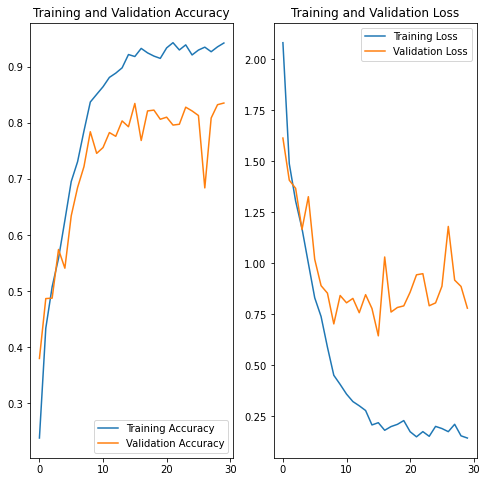

In [122]:
plot_accuracy_loss(history_final)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### After Using Augmentor Library

Now, we can clearly see that model is overfitting on train data. So, its giving far higher training accuracy than validation accuracy. There is about 10% difference in between training accuracy & validation accuracy.

Now, we have enough variance in dataset & data size is also quite good. But it is overfitting.

IF we want to reduce the overfitting, we can use below regularization:
    1. Dropouts - We can add more percentage of dropout after each (convo + pooling) layer. We have used 10% of dropouts. We can increase it to 20%.
    2. Bacth Normalization -  We can use batch normalization method
    3. L1 & L2 regularization - We can Lasso & Ridge regularization, to overcome the overfitting issue.
    
We can try with the above listed experiments. But due to resource and time constraints, I am not able to show the those experiments in this notebook.

## End of File. Thank you !!